**Deep Learning Assignment 3: Python Code Notebook for Implementation of ResNet16 on Cancer CT Scan dataset**

**Author:** Srirupa Guha

**Date:** 16th June 2022

**Email id:** srirupaguha18@gmail.com

Mounting the Google Drive to load Covid dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Imports**

In [ ]:
import cv2
import numpy as np
import shutil
import os
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
import keras
from keras.models import Sequential, Model,load_model
from tensorflow.keras.optimizers import SGD
from keras.callbacks import EarlyStopping,ModelCheckpoint
from google.colab.patches import cv2_imshow
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
from keras.preprocessing import image
from keras.initializers import glorot_uniform
import tensorflow as tf
from matplotlib import pyplot

In [ ]:
# folder path
benign_dir_path = r'/content/drive/MyDrive/Paper_Publications_Files/Paper_3/Annotated_Cropped_Dataset/Benign/'
benign_image_count = 0
# Iterate directory
for path in os.listdir(benign_dir_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(benign_dir_path, path)):
        benign_image_count += 1
print('File count:', benign_image_count)

File count: 3761


In [ ]:
# folder path
malignant_dir_path = r'/content/drive/MyDrive/Paper_Publications_Files/Paper_3/Annotated_Cropped_Dataset/Malignant/'
malignant_image_count = 0
# Iterate directory
for path in os.listdir(malignant_dir_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(malignant_dir_path, path)):
        malignant_image_count += 1
print('File count:', malignant_image_count)

File count: 1444


In [ ]:
# benign_train_size = 0.7*benign_image_count
# benign_val_size = 0.2*benign_image_count
# benign_test_size = 0.1*benign_image_count

# malignant_train_size = 0.7*malignant_image_count
# malignant_val_size = 0.2*malignant_image_count
# malignant_test_size = 0.1*malignant_image_count

In [ ]:
# benign_source_folder = '/content/drive/MyDrive/Assignments/Assignment 3/Annotated_Cropped_Dataset/Benign/'
# malignant_source_folder = '/content/drive/MyDrive/Assignments/Assignment 3/Annotated_Cropped_Dataset/Malignant/'

# train_benign_destination_folder = '/content/drive/MyDrive/Assignments/Assignment 3/Annotated_Cropped_Dataset_Training/Train/Benign/'
# train_malignant_destination_folder = '/content/drive/MyDrive/Assignments/Assignment 3/Annotated_Cropped_Dataset_Training/Train/Malignant/'

# val_benign_destination_folder = '/content/drive/MyDrive/Assignments/Assignment 3/Annotated_Cropped_Dataset_Training/Val/Benign/'
# val_malignant_destination_folder = '/content/drive/MyDrive/Assignments/Assignment 3/Annotated_Cropped_Dataset_Training/Val/Malignant/'

# test_benign_destination_folder = '/content/drive/MyDrive/Assignments/Assignment 3/Annotated_Cropped_Dataset_Training/Test/Benign/'
# test_malignant_destination_folder = '/content/drive/MyDrive/Assignments/Assignment 3/Annotated_Cropped_Dataset_Training/Test/Malignant/'

# #benign

# benign_count = 0

# for filename in os.listdir(benign_source_folder):
#     print(filename)

#     benign_count = benign_count + 1

#     if benign_count <= benign_train_size:
#       shutil.copy2(benign_source_folder + filename, train_benign_destination_folder + filename)

#     elif ((benign_count > benign_train_size) and (benign_count <= benign_train_size + benign_val_size + 1)):
#       shutil.copy(benign_source_folder + filename, val_benign_destination_folder + filename)

#     elif ((benign_count > benign_train_size + benign_val_size + 1) and (benign_count <= benign_train_size + benign_val_size + benign_test_size + 1)):
#       shutil.copy(benign_source_folder + filename, test_benign_destination_folder + filename)

# #malignant

# malignant_count = 0

# for filename in os.listdir(malignant_source_folder):
#     print(filename)

#     malignant_count = malignant_count + 1

#     if malignant_count <= malignant_train_size:
#       shutil.copy(malignant_source_folder + filename, train_malignant_destination_folder + filename)

#     elif ((malignant_count > malignant_train_size) and (malignant_count <= malignant_train_size + malignant_val_size + 1)):
#       shutil.copy(malignant_source_folder + filename, val_malignant_destination_folder + filename)

#     elif ((malignant_count > malignant_train_size + malignant_val_size + 1) and (malignant_count <= malignant_train_size + malignant_val_size + malignant_test_size + 1)):
#       shutil.copy(malignant_source_folder + filename, test_malignant_destination_folder + filename)

In [ ]:
# train_path="/content/drive/MyDrive/Assignments/Assignment 3/Annotated_Cropped_Dataset_Training/Train/"
# val_path="/content/drive/MyDrive/Assignments/Assignment 3/Annotated_Cropped_Dataset_Training/Val/"
# test_path="/content/drive/MyDrive/Assignments/Assignment 3/Annotated_Cropped_Dataset_Training/Test/"
# class_names=os.listdir(train_path)
# class_names_val=os.listdir(val_path)
# class_names_test=os.listdir(test_path)

# print(class_names)
# print(class_names_test)

In [ ]:
# #Sample datasets images

# image_Benign =cv2.imread("/content/drive/MyDrive/Assignments/Assignment 3/Custom_Dataset/Train/Benign/01.jpg")
# imS1 = cv2.resize(image_Benign, (100, 100))
# cv2_imshow(imS1)
# image_Malignant=cv2.imread("/content/drive/MyDrive/Assignments/Assignment 3/Custom_Dataset/Train/Malignant/03.jpg")
# imS2 = cv2.resize(image_Malignant, (100, 100))
# cv2_imshow(imS2)

In [ ]:
# train_datagen = ImageDataGenerator(zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15)
# val_datagen = ImageDataGenerator()
# test_datagen = ImageDataGenerator()

In [ ]:
# train_generator = train_datagen.flow_from_directory("/content/drive/MyDrive/Assignments/Assignment 3/Model_Training_Dataset/Train/",target_size=(224, 224),batch_size=32,shuffle=True,class_mode='binary')
# val_generator = val_datagen.flow_from_directory("/content/drive/MyDrive/Assignments/Assignment 3/Model_Training_Dataset/Val/",target_size=(224,224),batch_size=32,shuffle=False,class_mode='binary')
# test_generator = test_datagen.flow_from_directory("/content/drive/MyDrive/Assignments/Assignment 3/Model_Training_Dataset/Test/",target_size=(224,224),batch_size=32,shuffle=False,class_mode='binary')

In [ ]:
import os

train_benign_list = os.listdir("/content/drive/MyDrive/Paper_Publications_Files/Paper_3/Model_Training_Dataset/Train/Benign") # dir is your directory path
train_benign_number_files = len(train_benign_list)
train_benign_number_files

2633

In [ ]:
train_malignant_list = os.listdir("/content/drive/MyDrive/Paper_Publications_Files/Paper_3/Model_Training_Dataset/Train/Malignant") # dir is your directory path
train_malignant_number_files = len(train_malignant_list)
train_malignant_number_files

1011

In [ ]:
val_benign_list = os.listdir("/content/drive/MyDrive/Paper_Publications_Files/Paper_3/Model_Training_Dataset/Val/Benign") # dir is your directory path
val_benign_number_files = len(val_benign_list)
val_benign_number_files

1128

In [ ]:
val_malignant_list = os.listdir("/content/drive/MyDrive/Paper_Publications_Files/Paper_3/Model_Training_Dataset/Val/Malignant") # dir is your directory path
val_malignant_number_files = len(val_malignant_list)
val_malignant_number_files

433

In [ ]:
test_benign_list = os.listdir("/content/drive/MyDrive/Paper_Publications_Files/Paper_3/Model_Training_Dataset/Test/Benign") # dir is your directory path
test_benign_number_files = len(test_benign_list)
test_benign_number_files

376

In [ ]:
test_malignant_list = os.listdir("/content/drive/MyDrive/Paper_Publications_Files/Paper_3/Model_Training_Dataset/Test/Malignant") # dir is your directory path
test_malignant_number_files = len(test_malignant_list)
test_malignant_number_files

144

**Defining functions for identity block, convolutional block and ResNet16**

In [ ]:
def identity_block(X, f, filters, stage, block):

    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    F1, F2, F3 = filters

    X_shortcut = X

    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X = Add()([X, X_shortcut])# SKIP Connection
    X = Activation('relu')(X)

    return X

In [ ]:
def convolutional_block(X, f, filters, stage, block, s=2):

    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    F1, F2, F3 = filters

    X_shortcut = X

    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X_shortcut = Conv2D(filters=F3, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '1', kernel_initializer=glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis=3, name=bn_name_base + '1')(X_shortcut)

    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X

In [ ]:
def ResNet16(input_shape=(224, 224, 3)):

    X_input = Input(input_shape)

    X = ZeroPadding2D((3, 3))(X_input)

    X = Conv2D(64, (7, 7), strides=(2, 2), name='conv1', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    X = convolutional_block(X, f=3, filters=[64, 64, 256], stage=2, block='a', s=1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')


    X = convolutional_block(X, f=3, filters=[128, 128, 512], stage=3, block='a', s=2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')

    X = AveragePooling2D(pool_size=(2, 2), padding='same')(X)

    model = Model(inputs=X_input, outputs=X, name='ResNet16')

    return model

In [ ]:
base_model = ResNet16(input_shape=(224, 224, 3))
headModel = base_model.output
headModel = Flatten()(headModel)
headModel=Dense(256, activation='relu', name='fc1',kernel_initializer=glorot_uniform(seed=0))(headModel)
headModel=Dense(128, activation='relu', name='fc2',kernel_initializer=glorot_uniform(seed=0))(headModel)
headModel = Dense( 1,activation='sigmoid', name='fc3',kernel_initializer=glorot_uniform(seed=0))(headModel)

**Model Summary**

In [ ]:
model = Model(inputs=base_model.input, outputs=headModel)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1 (Conv2D)                 (None, 112, 112, 64  9472        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                              

**Visualizing the RestNet16 architecture**

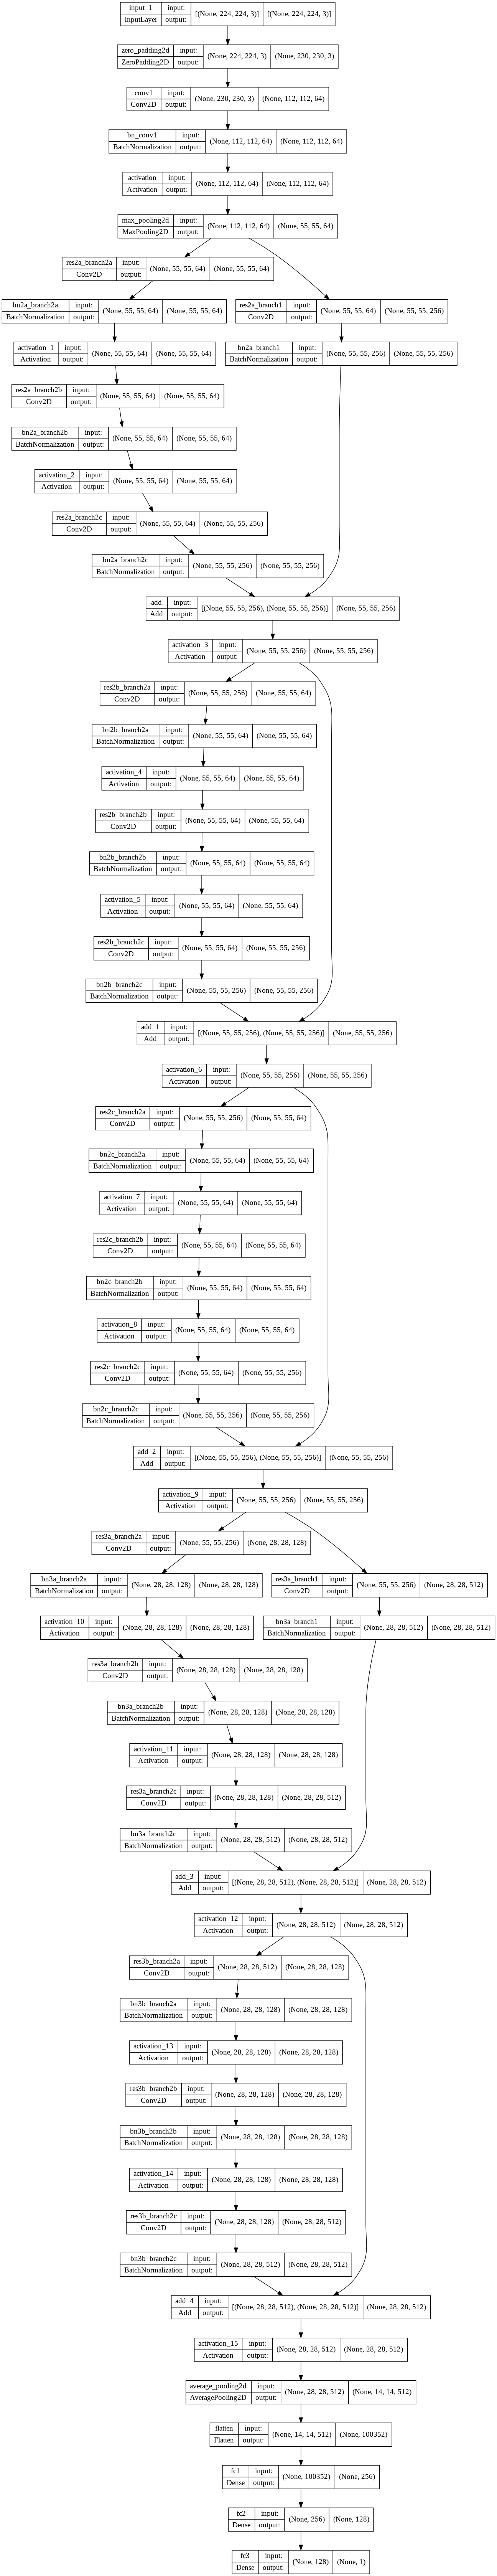

In [ ]:
dot_img_file = '/content/drive/MyDrive/Assignments/Assignment 3/ResNet16.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

**Preprocessing the train and test images before training and validating the ResNet16 model**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#Applying Augmentaion on data to avoid overfitting
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
val_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set =train_datagen.flow_from_directory('/content/drive/MyDrive/Assignments/Assignment 3/Model_Training_Dataset/Train/',target_size = (224, 224),batch_size = 8,class_mode = 'binary')
val_set = val_datagen.flow_from_directory('/content/drive/MyDrive/Assignments/Assignment 3/Model_Training_Dataset/Val/',target_size = (224, 224),batch_size = 8,class_mode = 'binary')
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Assignments/Assignment 3/Model_Training_Dataset/Test/',target_size = (224, 224),batch_size = 8,class_mode = 'binary')
type(training_set)

Found 3644 images belonging to 2 classes.
Found 1561 images belonging to 2 classes.
Found 520 images belonging to 2 classes.


keras.preprocessing.image.DirectoryIterator

In [ ]:
#model.fit(training_set,steps_per_epoch = 10,epochs = 10,validation_data = test_set,validation_steps = 5)

**Training the model**

In [ ]:
history = model.fit(training_set,steps_per_epoch = 10,epochs = 200,validation_data = val_set,validation_steps = 5)

Epoch 1/200
10/10 [==============================] - 41s 3s/step - loss: 14.8654 - accuracy: 0.6125 - val_loss: 0.6761 - val_accuracy: 0.7250
Epoch 2/200
10/10 [==============================] - 19s 2s/step - loss: 9.2350 - accuracy: 0.6500 - val_loss: 0.5837 - val_accuracy: 0.7000
Epoch 3/200
10/10 [==============================] - 19s 2s/step - loss: 8.9299 - accuracy: 0.7750 - val_loss: 1.7926 - val_accuracy: 0.2750
Epoch 4/200
10/10 [==============================] - 18s 2s/step - loss: 2.9034 - accuracy: 0.7500 - val_loss: 1.4030 - val_accuracy: 0.2750
Epoch 5/200
10/10 [==============================] - 17s 2s/step - loss: 1.7607 - accuracy: 0.9375 - val_loss: 8.0967 - val_accuracy: 0.2250
Epoch 6/200
10/10 [==============================] - 15s 2s/step - loss: 2.6821 - accuracy: 0.8375 - val_loss: 4.6539 - val_accuracy: 0.3250
Epoch 7/200
10/10 [==============================] - 17s 2s/step - loss: 1.7287 - accuracy: 0.8125 - val_loss: 1.9561 - val_accuracy: 0.2750
Epoch 8/200


**Variation of Train and Validation loss and accuracy with number of epochs**

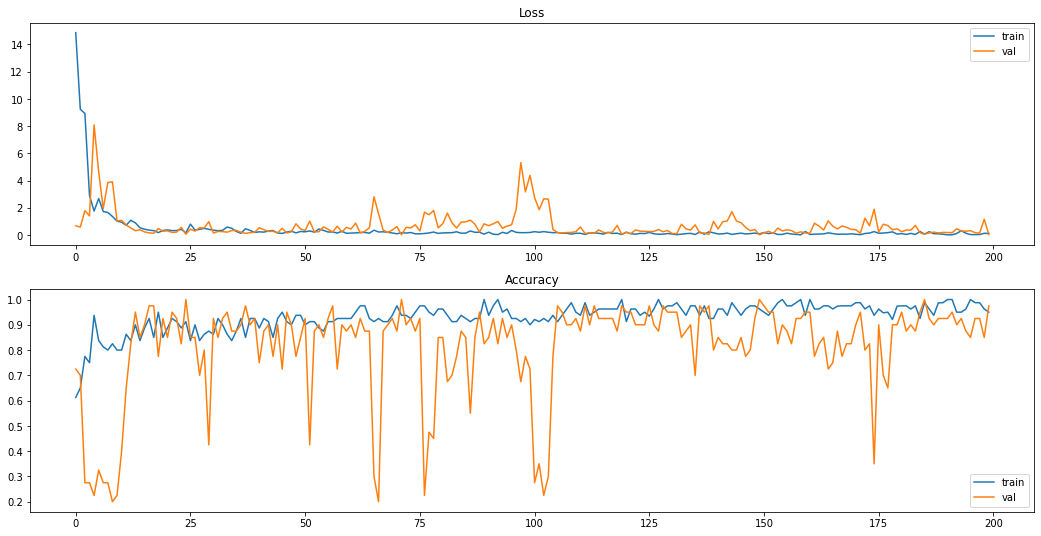

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (18,9)

# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='val')
pyplot.legend()
pyplot.savefig('/content/drive/MyDrive/Assignments/Assignment 3/TrainTest_LossAccuracy_Graph_ResNet16.png')
pyplot.show()

**Generating predictions and evaluation metrics on test set: Benign and Malignant**

In [ ]:
test_steps_per_epoch = np.math.ceil(test_set.samples / test_set.batch_size)

predictions = model.predict_generator(test_set, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
true_classes = test_set.classes
class_labels = list(test_set.class_indices.keys())

In [ ]:
predicted_classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
true_classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

**Generating model evaluation metrics like confusion matrix, precision, recall,F1 score**

**Train and Test accuracy have been generated earlier**

In [ ]:
import sklearn.metrics as metrics
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

              precision    recall  f1-score   support

      Benign       0.72      1.00      0.84       376
   Malignant       0.00      0.00      0.00       144

    accuracy                           0.72       520
   macro avg       0.36      0.50      0.42       520
weighted avg       0.52      0.72      0.61       520



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
confusion_matrix = metrics.confusion_matrix(y_true=true_classes, y_pred=predicted_classes)

In [ ]:
len(true_classes)

520

In [ ]:
len(predicted_classes)

520

In [ ]:
confusion_matrix

array([[376,   0],
       [144,   0]])

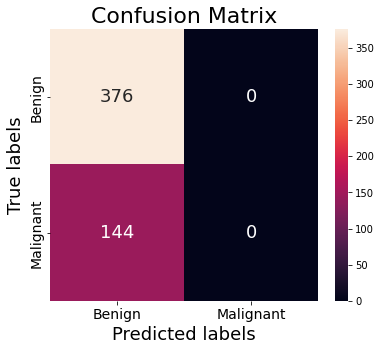

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (6,5)
ax= plt.subplot()
sns.heatmap(confusion_matrix, annot=True, fmt='g', ax=ax, annot_kws={"fontsize":18});  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=18);
ax.set_ylabel('True labels', fontsize=18);
ax.set_title('Confusion Matrix',fontsize=22);
ax.xaxis.set_ticklabels(['Benign', 'Malignant'],fontsize=14);
ax.yaxis.set_ticklabels(['Benign', 'Malignant'],fontsize=14);

plt.savefig('/content/drive/MyDrive/Assignments/Assignment 3/Confusion_Matrix_ResNet16.png')

Val accuracy: 90.0%, Test accuracy: 86.4%